**Shubham Gopal Raul**  
*CB.EN.P2AEL23023*<br> 

## <center>21BM681 Machine Learning and Embedded Programming Lab 3</center>

### <center>Statistical Measures and Data Visualization</center>

<br> 

1. For the dataset given

In [2]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations as comb
from sklearn.model_selection import train_test_split

In [3]:
sklearn.__all__

['calibration',
 'cluster',
 'covariance',
 'cross_decomposition',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'experimental',
 'externals',
 'feature_extraction',
 'feature_selection',
 'gaussian_process',
 'inspection',
 'isotonic',
 'kernel_approximation',
 'kernel_ridge',
 'linear_model',
 'manifold',
 'metrics',
 'mixture',
 'model_selection',
 'multiclass',
 'multioutput',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised',
 'svm',
 'tree',
 'discriminant_analysis',
 'impute',
 'compose',
 'clone',
 'get_config',
 'set_config',
 'config_context',
 'show_versions']

In [2]:
#Using the Iris data set for analysis
Iris = pd.read_csv('../Data/iris.csv',names=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species'])
Iris.head(3)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


<br>

- Compute the central tendency measures. (Employ user-defined function for each measure)


In [3]:
#User Defined function for measuring central Tendancy
def Central_Tendancy(df):
    df = df.select_dtypes(include='number')
    mean,median,mode=[],[],[]
    for i in df.columns:
        data,N = sorted(df[i]),len(df[i])
        mean.append(sum(data)/N)
        idx = N//2
        if N%2==0:
            median.append((data[idx]+data[idx+1])/2)
        else:
            median.append(data[idx])
        df_freq = df[i].value_counts()
        max_freq = max(list(df[i].value_counts()))
        mode.append(df_freq[df_freq==max_freq].index.values)
    return pd.DataFrame([mean,median,mode],index=['Mean','Median','Mode'],columns=df.columns)
            

In [4]:
print('Central Tendancy of data :  ',Central_Tendancy(Iris),sep='\n\n')

Central Tendancy of data :  

       Sepal_length Sepal_width Petal_length Petal_width
Mean       5.843333       3.054     3.758667    1.198667
Median          5.8         3.0          4.4         1.3
Mode          [5.0]       [3.0]        [1.5]       [0.2]


<br><br>

- Compute the measures of dispersion. (Employ user-defined function for each measure)

In [5]:
def Dispersion(df):
    df = df.select_dtypes(include='number')
    rng,Mid_rng,var,std,Min,Q1,Q2,Q3,Max,IQR = [],[],[],[],[],[],[],[],[],[]
    for i in df.columns:
        data,N = sorted(df[i]),len(df[i])
        Mid_rng.append((max(data)+min(data))/2)
        rng.append(max(data)-min(data))
        m,s=sum(data)/N,0
        for j in data:
            s += (j-m)**2
        var.append(s/N)
        std.append(math.sqrt(s/N))
        Min.append(data[0])
        Max.append(data[-1])
        Q1.append(data[int(N*0.25)])
        Q2.append(Central_Tendancy(df).loc['Median',i])
        Q3.append(data[int(N*0.75)])
        IQR.append((data[int(N*0.75)]-data[int(N*0.25)]))
    return pd.DataFrame([rng,Mid_rng,var,std,Min,Q1,Q2,Q3,Max,IQR],columns=df.columns,index=['Range','Mid Range','Variance','Standard Daviation','Min','25%','50%','75%','Max','IQR'])

In [6]:
print('Dispersion of Data :  ',Dispersion(Iris),sep='\n\n')

Dispersion of Data :  

                    Sepal_length  Sepal_width  Petal_length  Petal_width
Range                   3.600000     2.400000      5.900000     2.400000
Mid Range               6.100000     3.200000      3.950000     1.300000
Variance                0.681122     0.186751      3.092425     0.578532
Standard Daviation      0.825301     0.432147      1.758529     0.760613
Min                     4.300000     2.000000      1.000000     0.100000
25%                     5.100000     2.800000      1.600000     0.300000
50%                     5.800000     3.000000      4.400000     1.300000
75%                     6.400000     3.300000      5.100000     1.800000
Max                     7.900000     4.400000      6.900000     2.500000
IQR                     1.300000     0.500000      3.500000     1.500000


<br><br>

- Obtain the scatter plots and boxplots for the given dataset.

In [7]:
#Scatter plot
def Scatter_plot(df,name,size):
    fig,i,row = plt.figure(figsize=size),1,len(list(comb(df.select_dtypes(include='number'),2)))
    fig.suptitle('Scatter plot of '+name+' Data')
    fig.subplots_adjust(top=0.95)
    for fet_1,fet_2 in comb(df.select_dtypes(include='number'),2):
        ax = fig.add_subplot(row,1,i)
        ax.set_title('Scatter plot between '+fet_1+' VS '+fet_2)
        plt.subplots_adjust(hspace=0.25)
        sns.scatterplot(x=df[fet_1],y=df[fet_2],hue=df.iloc[:,-1],style=df.iloc[:,-1])
        i+=1
    plt.savefig("Graphs/"+name+" Scatterplot.pdf", format='pdf')
    return

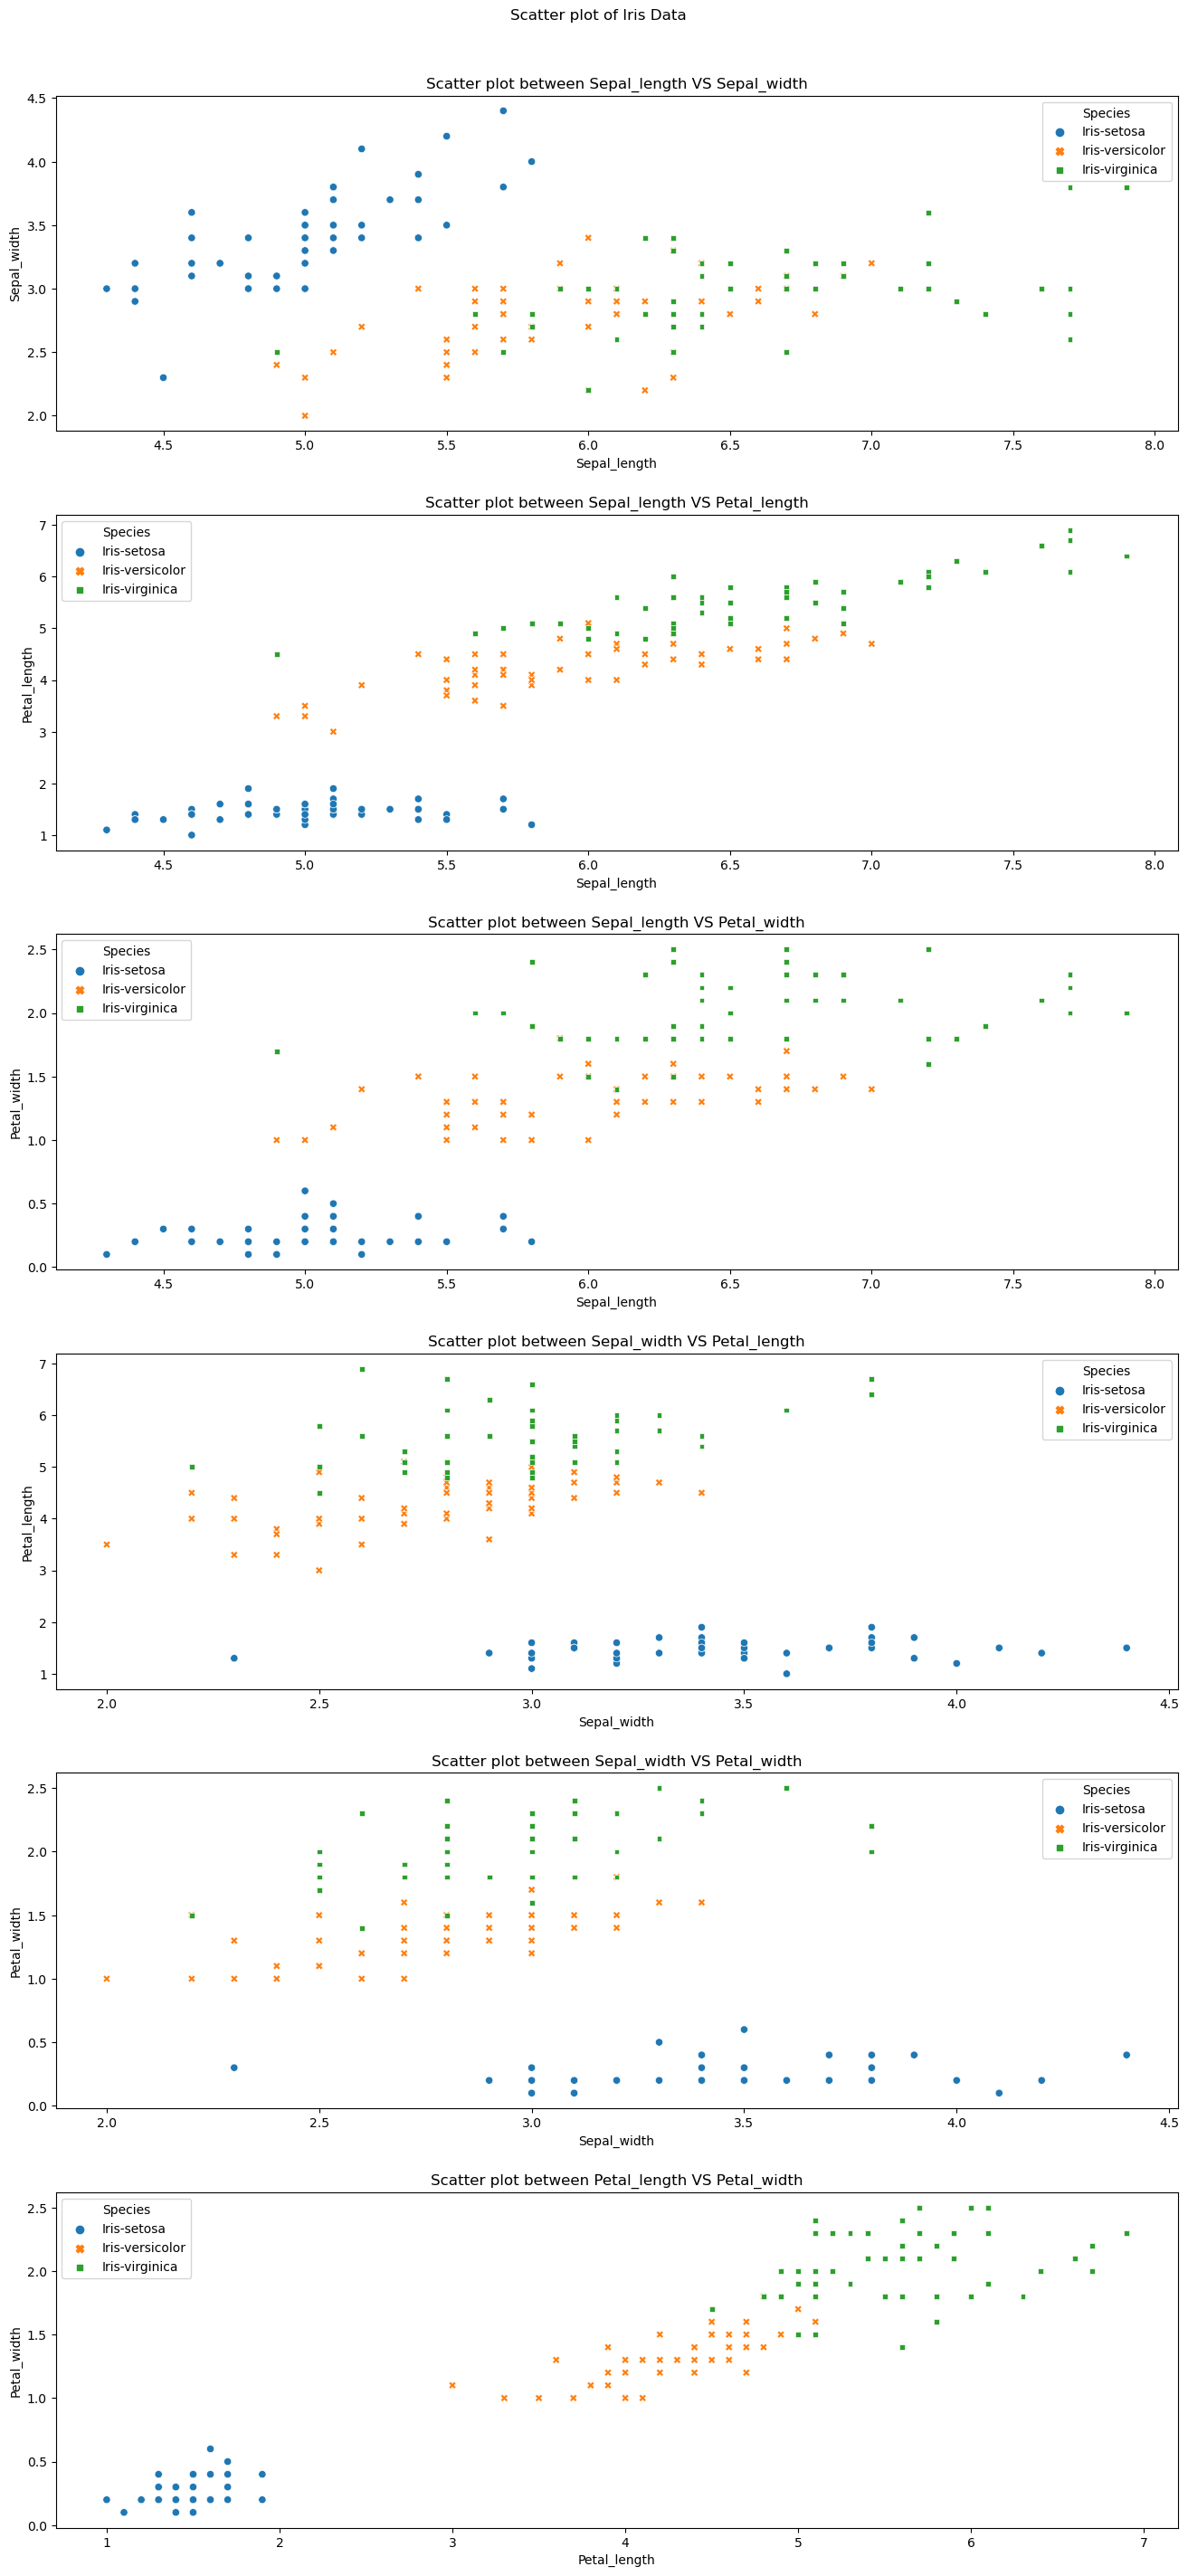

In [8]:
Scatter_plot(Iris,'Iris',(16,32))

In [13]:
# Box Plot
def Box_plot(df,name):
    fig=plt.figure(figsize=(12,6))
    plt.title('Box-Plot of '+name+' Complete Data')
    sns.boxplot(data=df.iloc[:,:-1])
    plt.savefig('Graphs/Box-Plot of '+name+' Complete Data.pdf',format="pdf")
    fig1 = plt.figure(figsize=(12,18))
    fig1.suptitle('Box-Plot of '+name+' Label Data')
    fig1.subplots_adjust(top=0.95)
    df_group,lable,j=df.groupby(df.columns[-1]),df.iloc[:,-1].unique(),1
    for i in lable:
        ax = fig1.add_subplot(len(lable),1,j)
        ax.set_title('Box-Plot on '+i+' '+df.columns[-1])
        sns.boxplot(data=df_group.get_group(i))
        j+=1
    plt.savefig('Graphs/Box-Plot of '+name+' Label Data.pdf',format="pdf")
    return

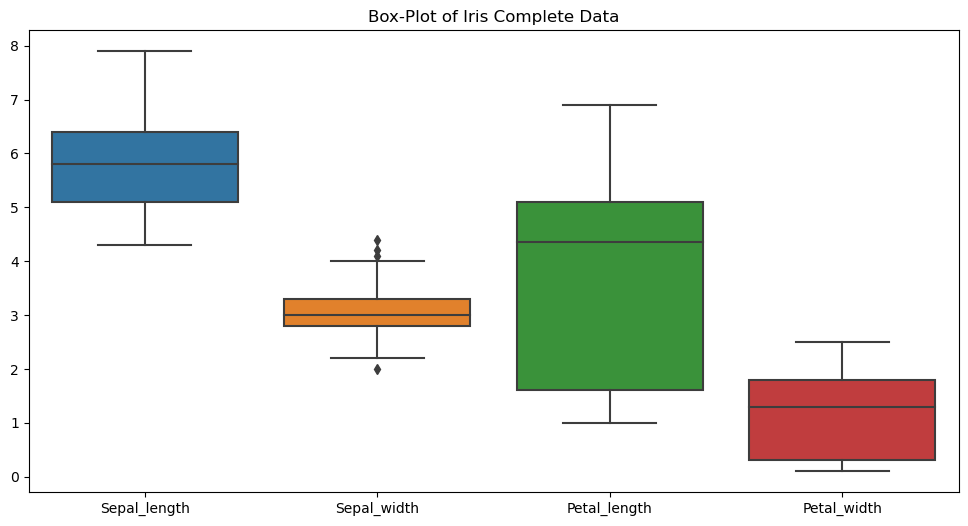

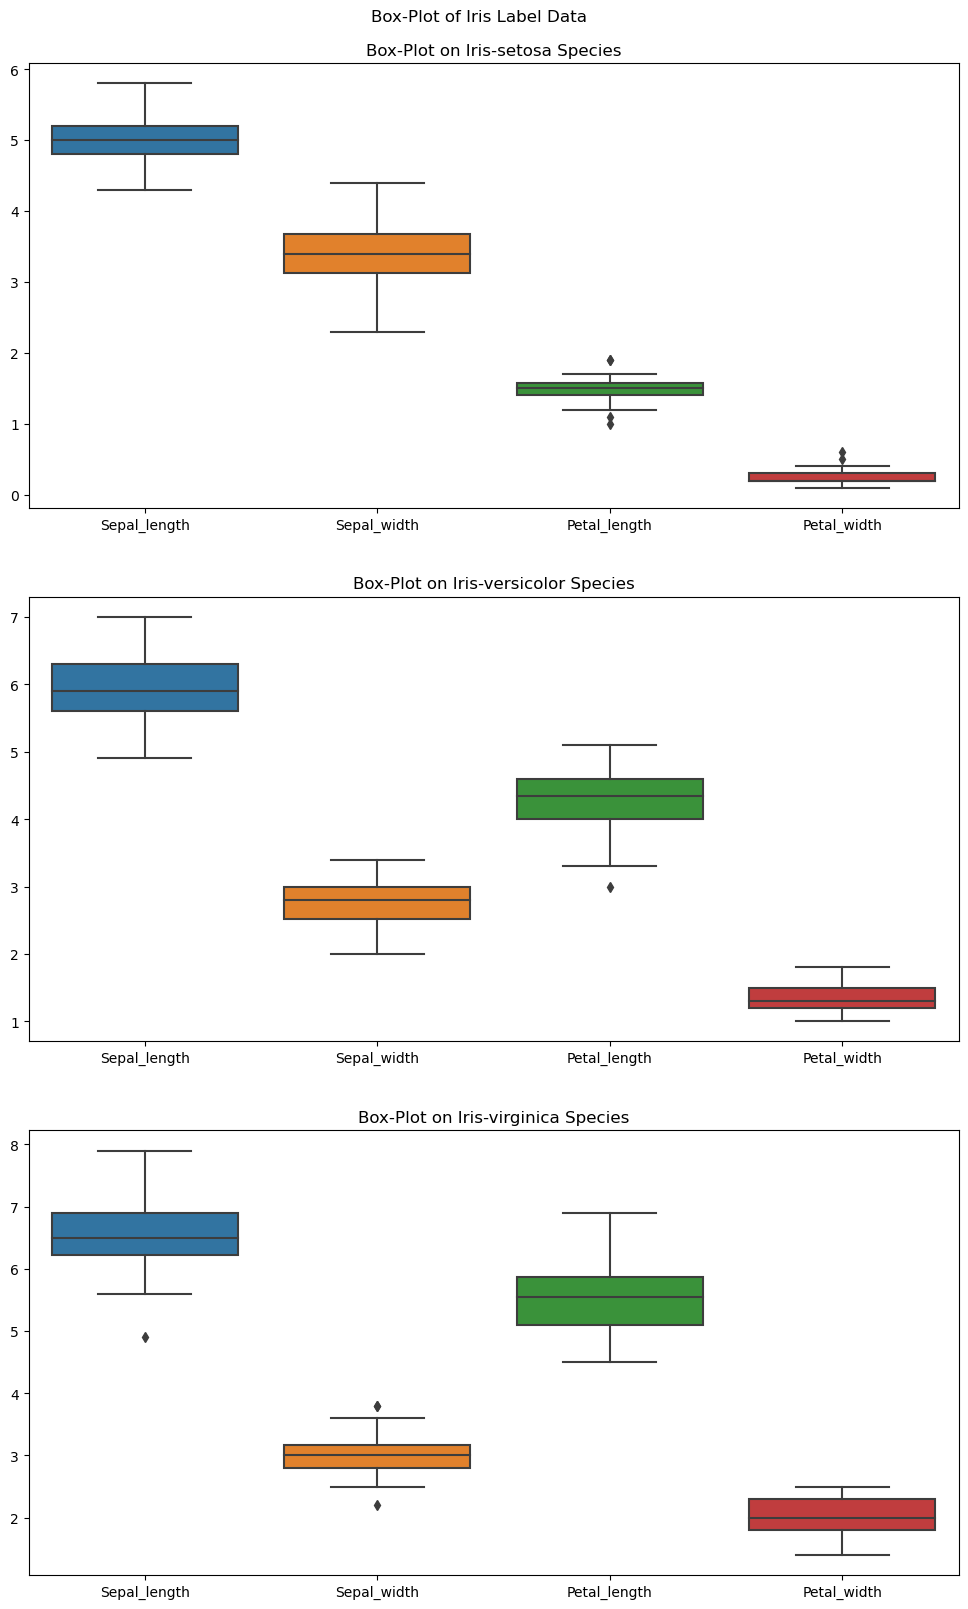

In [14]:
Box_plot(Iris,'Iris')

<br><br> 
Give your inferences

 - By Visualizing data on Iris dataset using scatterplot and boxplot, the spread of the data across shows the relation of multiple fetures signifing the target class label i.e. "Sepcies" the higher the length and width the greater is probality of target class being "Iris-Virginica" and lower the lentgh and width probability of target class being "Iris-Setosa" is more.  
 - The box plot shows the visual on data dispersion, from the plot it's seen that there are multiple outlier that could affect the model, and ploting box-plot helps identifing potential outliers in the data.

<br>  

2. Create your own dataset.  
  Specification:
  - Four features (𝑓1, 𝑓2, 𝑓3)
- 100 samples
- Three classes (𝐴, 𝐵, 𝐶) – Class A 30 Samples; Class B 25 Samples; Class C 45 Samples   

and apply question 1 to this dataset. Datatype should be numeric and integers. Give
your inferences

In [11]:
# Creating user Defined Dataset
np.random.seed(100)
Class = {'A':[30,70,105],'B':[25,50,85],'C':[45,30,65]}
f1,f2,f3,label=[],[],[],[]
for i in Class:
    f1.extend(np.random.randint(Class[i][1],Class[i][2],size=Class[i][0]))
    f2.extend(np.random.randint(Class[i][1],Class[i][2],size=Class[i][0]))
    f3.extend(np.random.randint(Class[i][1],Class[i][2],size=Class[i][0]))
    label.extend(i*int(Class[i][0]))
Dict = {'f1':f1,'f2':f2,'f3':f3,'label':label}
Data = pd.DataFrame(Dict)
print(Data.head())

   f1   f2  f3 label
0  78   84  85     A
1  94   77  80     A
2  73   86  93     A
3  93   72  73     A
4  85  100  75     A


In [12]:
# Applying all fuctions from Q1 on Dataset
print('Central Tendancy of Data :  ',Central_Tendancy(Data),sep='\n\n')

Central Tendancy of Data :  

              f1                f2        f3
Mean       63.32             64.11      63.9
Median      61.5              63.5      62.5
Mode    [53, 59]  [46, 70, 80, 47]  [52, 67]


In [13]:
print('Dispersion of Data :  ',Dispersion(Data),sep='\n\n')

Dispersion of Data :  

                            f1         f2          f3
Range                74.000000   74.00000   74.000000
Mid Range            67.000000   67.00000   67.000000
Variance            409.557600  369.05790  411.030000
Standard Daviation   20.237529   19.21088   20.273875
Min                  30.000000   30.00000   30.000000
25%                  49.000000   47.00000   49.000000
50%                  61.500000   63.50000   62.500000
75%                  78.000000   80.00000   79.000000
Max                 104.000000  104.00000  104.000000
IQR                  29.000000   33.00000   30.000000


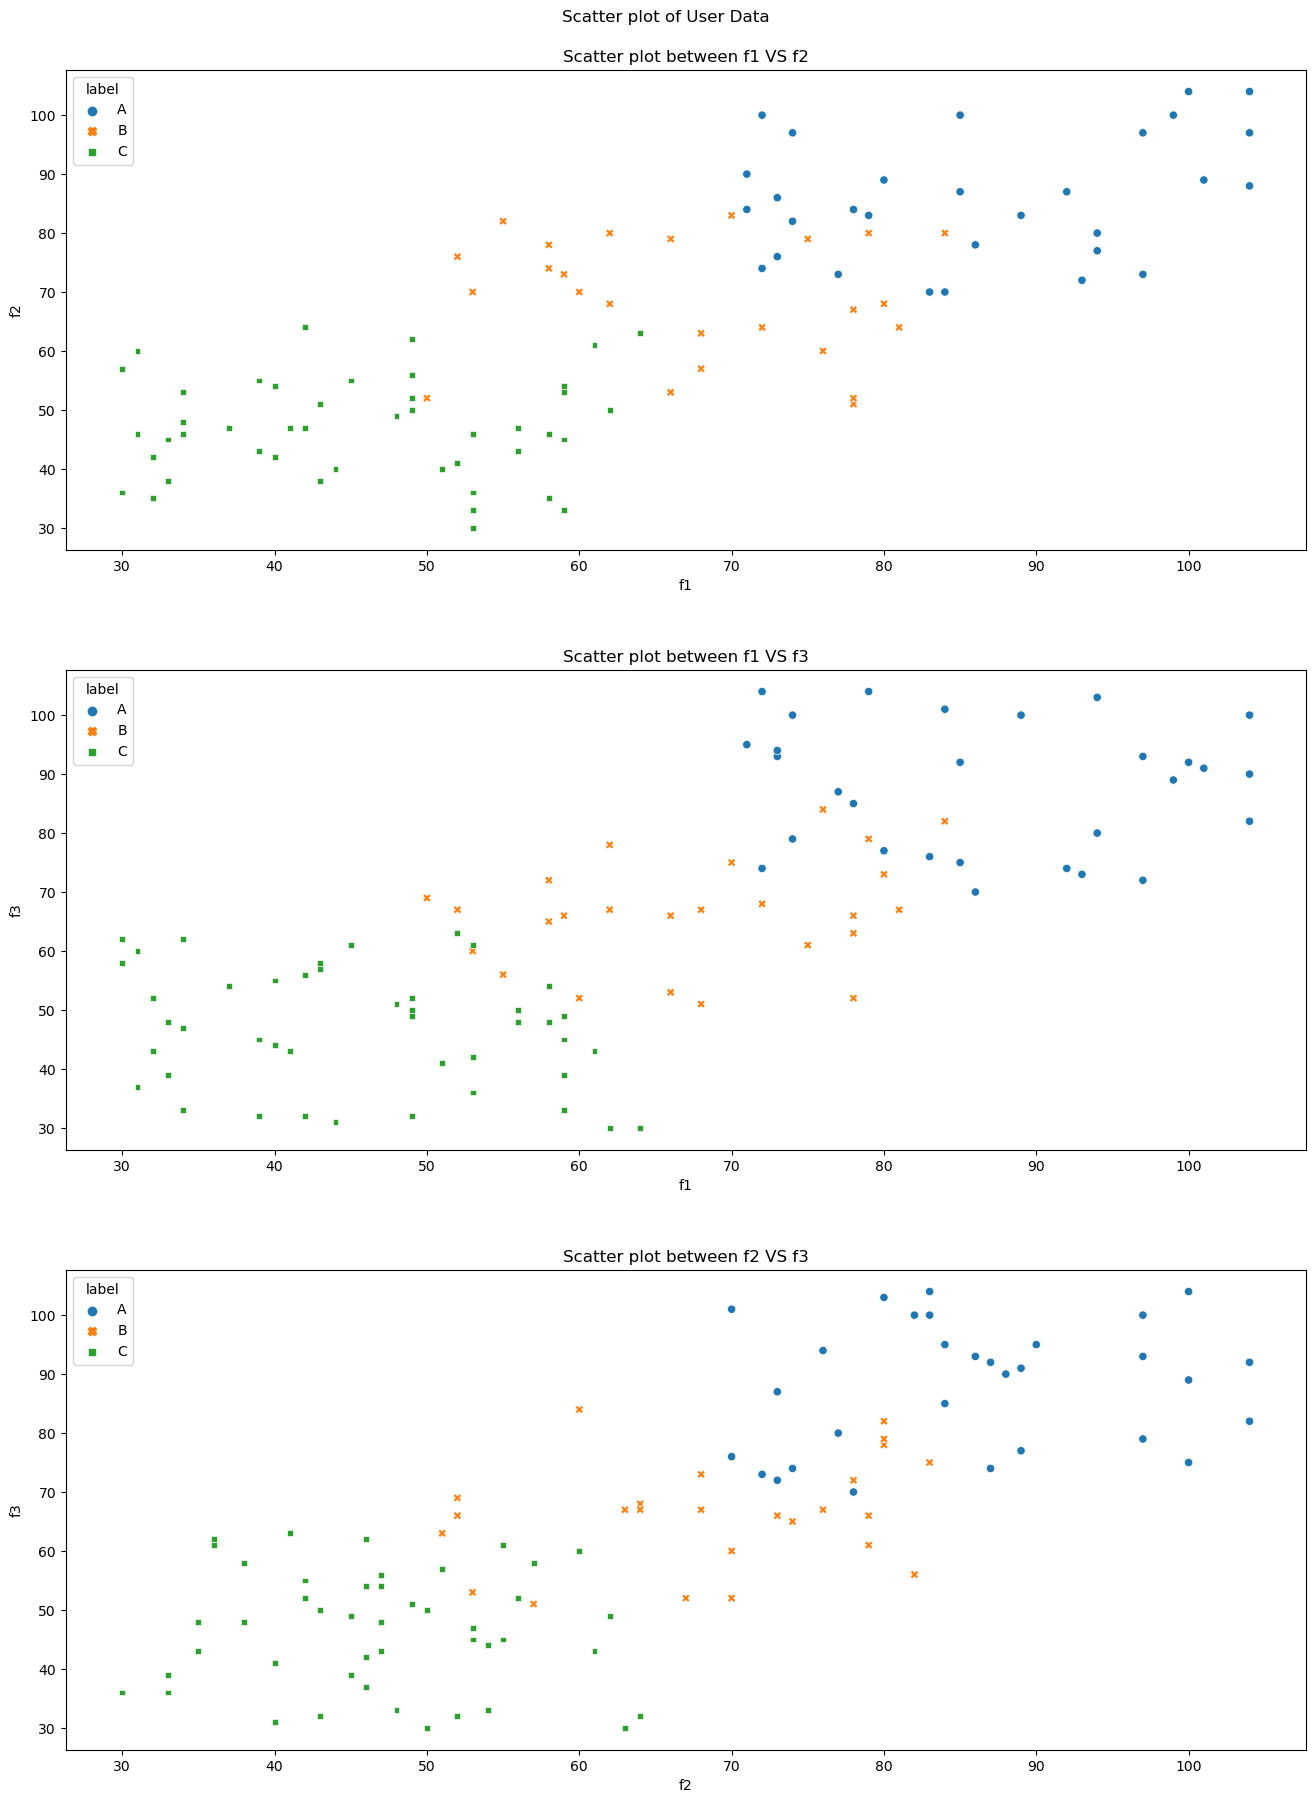

In [14]:
#Ploting on user Dataset
Scatter_plot(Data,'User',(16,20))

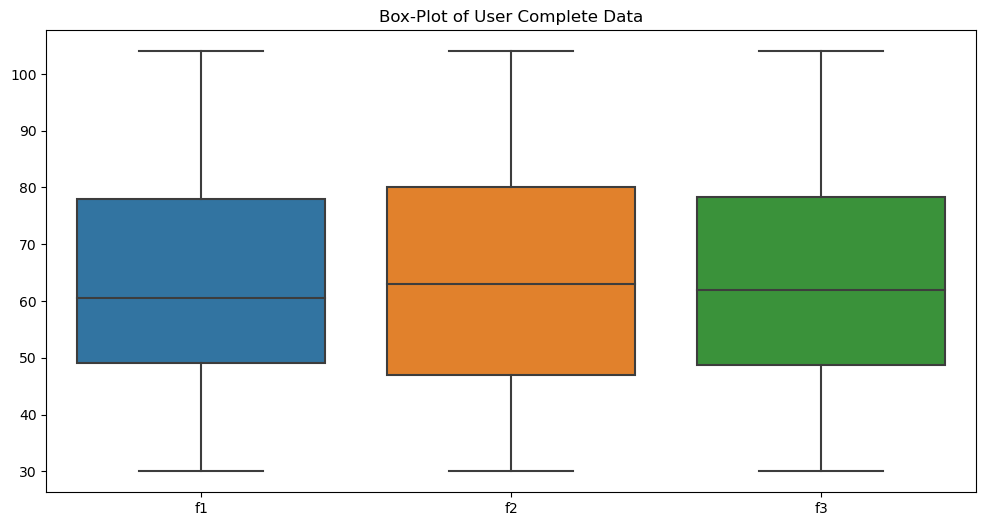

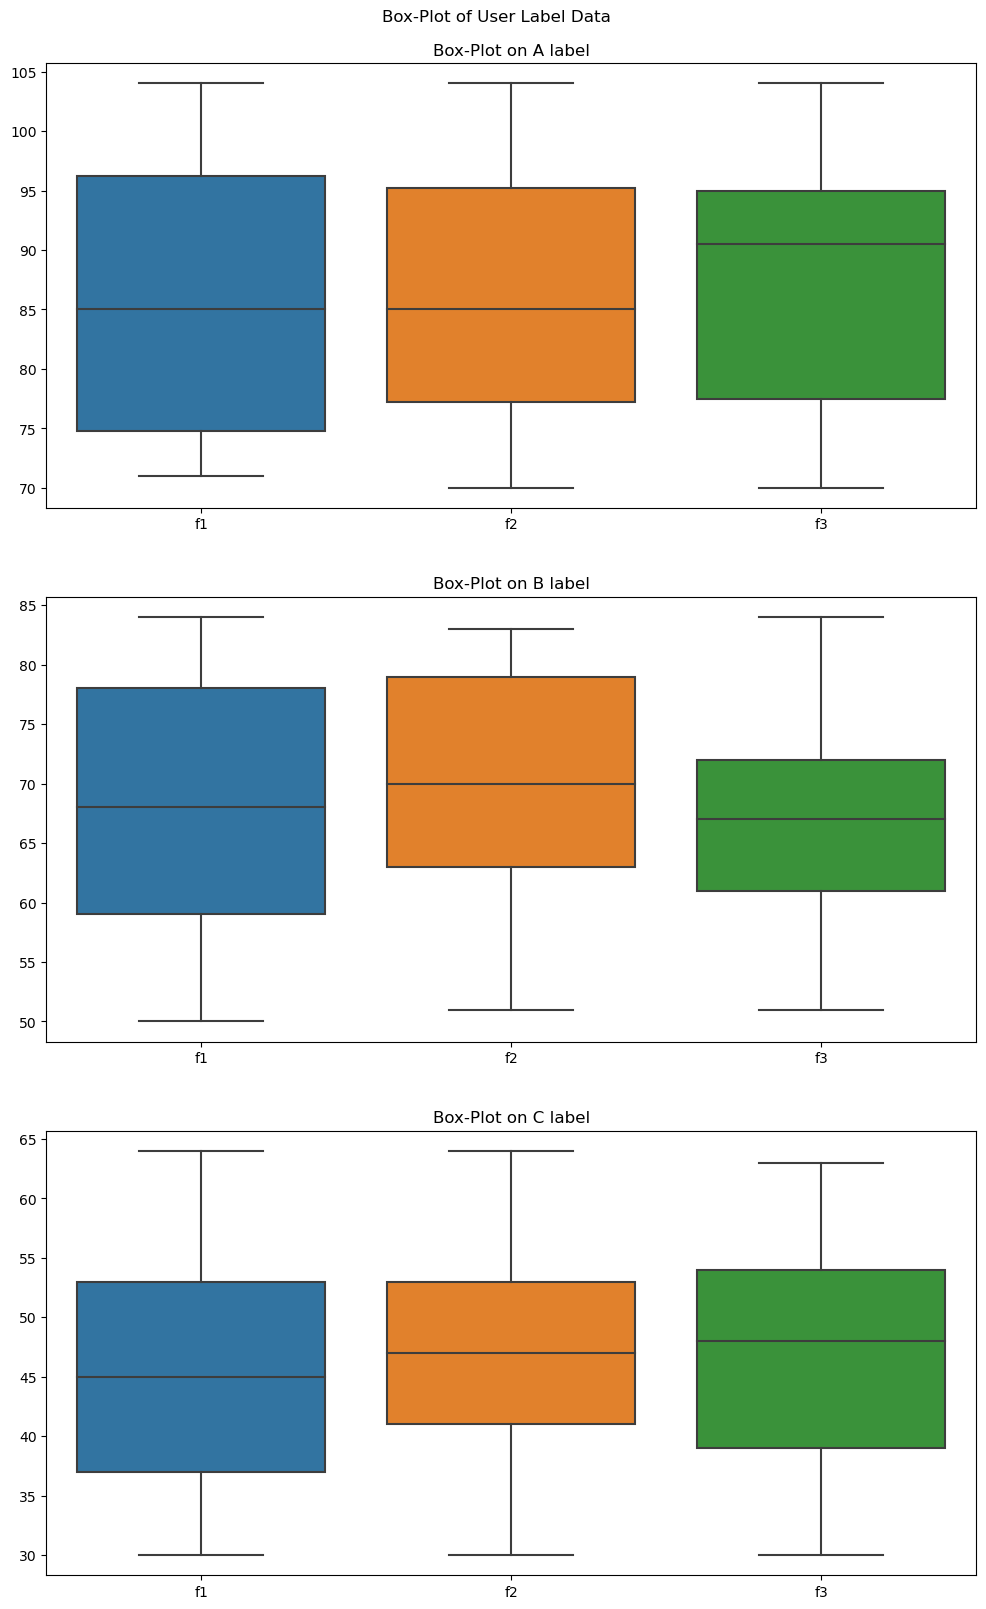

In [15]:
Box_plot(Data,'User')

 - By Visualizing data on user specified dataset using scatterplot and boxplot, the spread of the data across shows the relation of multiple fetures signifing the target i.e. "label", the higher feature values of f1,f2 and f3 the greater is probality of target class belonging to "A and lower element values probability of target class being "C" is more.  
 - The box plot shows the visual on data dispersion, and no potential outlier's are identified in the user specified data.

<br><br>

##### Additional Exercises

Split the data set into train and test set for the following train-test ratio   
- 90:10
- 80:20
- 70:30
- 60:40

In [16]:
def data_split(df,name):
    T_ratio = [(90,10),(80,20),(70,30),(60,40)]
    print("Distribution analysis of "+name+" train test set",end='\n\n')
    for i,j in T_ratio:
        x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=j/i, random_state=100)
        print("- Training set {}% and Testing set {}%".format(i,j))
        print('Shape :  ','X Train = '+str(x_train.shape),'X Test = '+str(x_test.shape),'Y Train = '+str(y_train.shape),'Y Test = '+str(y_test.shape),sep='\n',end='\n\n')
        print('Distribution of Target label : ')
        print('Y Train ',y_train.value_counts(),'\nY Test',y_test.value_counts(),sep='\n',end='\n\n\n')
    return

<br>
1. For the given dataset (Iris) Print the output and analyse the distribution of data in train and test sets

In [17]:
data_split(Iris,'Iris')


Distribution analysis of Iris train test set

- Training set 90% and Testing set 10%
Shape :  
X Train = (133, 4)
X Test = (17, 4)
Y Train = (133,)
Y Test = (17,)

Distribution of Target label : 
Y Train 
Iris-versicolor    48
Iris-virginica     43
Iris-setosa        42
Name: Species, dtype: int64

Y Test
Iris-setosa        8
Iris-virginica     7
Iris-versicolor    2
Name: Species, dtype: int64


- Training set 80% and Testing set 20%
Shape :  
X Train = (112, 4)
X Test = (38, 4)
Y Train = (112,)
Y Test = (38,)

Distribution of Target label : 
Y Train 
Iris-versicolor    40
Iris-virginica     36
Iris-setosa        36
Name: Species, dtype: int64

Y Test
Iris-virginica     14
Iris-setosa        14
Iris-versicolor    10
Name: Species, dtype: int64


- Training set 70% and Testing set 30%
Shape :  
X Train = (85, 4)
X Test = (65, 4)
Y Train = (85,)
Y Test = (65,)

Distribution of Target label : 
Y Train 
Iris-versicolor    34
Iris-setosa        27
Iris-virginica     24
Name: Species, dtype

<br>
2. For the Created dataset (user) Print the output and analyse the distribution of data in train and test sets


In [18]:
data_split(Data,'User')

Distribution analysis of User train test set

- Training set 90% and Testing set 10%
Shape :  
X Train = (88, 3)
X Test = (12, 3)
Y Train = (88,)
Y Test = (12,)

Distribution of Target label : 
Y Train 
C    42
A    27
B    19
Name: label, dtype: int64

Y Test
B    6
C    3
A    3
Name: label, dtype: int64


- Training set 80% and Testing set 20%
Shape :  
X Train = (75, 3)
X Test = (25, 3)
Y Train = (75,)
Y Test = (25,)

Distribution of Target label : 
Y Train 
C    35
A    23
B    17
Name: label, dtype: int64

Y Test
C    10
B     8
A     7
Name: label, dtype: int64


- Training set 70% and Testing set 30%
Shape :  
X Train = (57, 3)
X Test = (43, 3)
Y Train = (57,)
Y Test = (43,)

Distribution of Target label : 
Y Train 
C    26
A    17
B    14
Name: label, dtype: int64

Y Test
C    19
A    13
B    11
Name: label, dtype: int64


- Training set 60% and Testing set 40%
Shape :  
X Train = (33, 3)
X Test = (67, 3)
Y Train = (33,)
Y Test = (67,)

Distribution of Target label : 
Y Train 